In [137]:
from datamodule import datamodule

from transformer import Transformer
from lstm import LSTM
from FFNN import FFNN
from xgboost import XGBRegressor 
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import seaborn as sns

def eval_metrics(y_true, y_pred):
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    return (r2, mae, mse)

# GET DATA
dm = datamodule(datamodule.HOSTVETE)
dm.default_process(target='Svartpricksjuka')
splits = dm.CV_test_train_split(n_folds=10)

# ACTUALS AND PREDICTIONS
actuals = []

predictions_Transformer = [] # 3,
predictions_LSTM = [] # 4, 1, 
predictions_FFNN = [] # 5. 

predictions_HistGradientBoostingRegressor = [] # 1,
predictions_XGBRegressor = [] # 2, 6, 1

predictions_DecisionTreeRegressor = [] # 6,, 6

# RUN TESTS
current_split = 1
for X_train, X_test, y_train, y_test in splits:
    print(f"----------------------------- split {current_split}/{len(splits)} -----------------------------")
    current_split += 1

    timesteps = 1
    features = X_train.shape[1]
    X_train_lstm = np.array(X_train).reshape(-1, timesteps, features)
    X_test_lstm = np.array(X_test).reshape(-1, timesteps, features)

    # get model
    model_Transformer = Transformer(features=features)
    model_LSTM = LSTM(features=features, timesteps=timesteps)
    model_FFNN = FFNN(input_shape=features)
    model_HistGradientBoostingRegressor = HistGradientBoostingRegressor()
    model_DecisionTreeRegressor = DecisionTreeRegressor()
    model_predictions_XGBRegressor = XGBRegressor()
    
    # fit model
    model_Transformer.fit(X_train, y_train)
    model_HistGradientBoostingRegressor.fit(X_train, y_train.squeeze())
    model_DecisionTreeRegressor.fit(X_train, y_train.squeeze())
    model_predictions_XGBRegressor.fit(X_train, y_train.squeeze())
    model_FFNN.fit(X_train, y_train)
    model_LSTM.fit(X_train_lstm, y_train)
 
    # predict
    y_pred_HistGradientBoostingRegressor = pd.DataFrame(model_HistGradientBoostingRegressor.predict(X_test), index=X_test.index)
    y_pred_DecisionTreeRegressor = pd.DataFrame(model_DecisionTreeRegressor.predict(X_test), index=X_test.index)
    y_pred_XGBRegressor = pd.DataFrame(model_predictions_XGBRegressor.predict(X_test), index=X_test.index)
    y_pred_FFNN = pd.DataFrame(model_FFNN.predict(X_test), index=X_test.index)
    y_pred_LSTM = pd.DataFrame(model_LSTM.predict(X_test_lstm), index=X_test.index)
    y_pred_Transformer = pd.DataFrame(model_Transformer.predict(X_test), index=X_test.index)
 
    # inverse normalizaiton
    y_test = dm.inverse_scale(y_test)
    y_pred_HistGradientBoostingRegressor = dm.inverse_scale(y_pred_HistGradientBoostingRegressor)
    y_pred_DecisionTreeRegressor = dm.inverse_scale(y_pred_DecisionTreeRegressor)
    y_pred_XGBRegressor = dm.inverse_scale(y_pred_XGBRegressor)
    y_pred_FFNN = dm.inverse_scale(y_pred_FFNN)
    y_pred_LSTM = dm.inverse_scale(y_pred_LSTM)
    y_pred_Transformer = dm.inverse_scale(y_pred_Transformer)
 
    # save actuals and predictions
    actuals.append(y_test)
    predictions_HistGradientBoostingRegressor.append(y_pred_HistGradientBoostingRegressor)
    predictions_DecisionTreeRegressor.append(y_pred_DecisionTreeRegressor)
    predictions_XGBRegressor.append(y_pred_XGBRegressor)
    predictions_FFNN.append(y_pred_FFNN)
    predictions_LSTM.append(y_pred_LSTM)
    predictions_Transformer.append(y_pred_Transformer)

# GET EVALUTION METRIC RESULTS
actuals = pd.concat(actuals)

predictions_HistGradientBoostingRegressor = pd.concat(predictions_HistGradientBoostingRegressor)
r2_HistGradientBoostingRegressor, mae_HistGradientBoostingRegressor, mse_HistGradientBoostingRegressor = eval_metrics(actuals, predictions_HistGradientBoostingRegressor)

predictions_DecisionTreeRegressor = pd.concat(predictions_DecisionTreeRegressor)
r2_DecisionTreeRegressor, mae_DecisionTreeRegressor, mse_DecisionTreeRegressor = eval_metrics(actuals, predictions_DecisionTreeRegressor)

predictions_XGBRegressor = pd.concat(predictions_XGBRegressor)
r2_XGBRegressor, mae_XGBRegressor, mse_XGBRegressor = eval_metrics(actuals, predictions_XGBRegressor)

predictions_FFNN = pd.concat(predictions_FFNN)
r2_FFNN, mae_FFNN, mse_FFNN = eval_metrics(actuals, predictions_FFNN)

predictions_LSTM = pd.concat(predictions_LSTM)
r2_LSTM, mae_LSTM, mse_LSTM = eval_metrics(actuals, predictions_LSTM)

predictions_Transformer = pd.concat(predictions_Transformer)
r2_Transformer, mae_Transformer, mse_Transformer = eval_metrics(actuals, predictions_Transformer)

# collect metric outputs
models = ['HistGradientBoostingRegressor', 'DecisionTreeRegressor', 'XGBRegressor', 'FFNN', 'LSTM', 'Transformer']
r2s = [r2_HistGradientBoostingRegressor, r2_DecisionTreeRegressor, r2_XGBRegressor, r2_FFNN, r2_LSTM, r2_Transformer]
maes = [mae_HistGradientBoostingRegressor, mae_DecisionTreeRegressor, mae_XGBRegressor, mae_FFNN, mae_LSTM, mae_Transformer]
mses = [mse_HistGradientBoostingRegressor, mse_DecisionTreeRegressor, mse_XGBRegressor, mse_FFNN, mse_LSTM, mse_Transformer]

Possible targets ['Bladfläcksvampar', 'Brunrost', 'Svartpricksjuka', 'Gulrost', 'Mjöldagg', 'Vetets bladfläcksjuka', 'Gräsbladlus', 'Sädesbladlus', 'Havrebladlus', 'Nederbörd']
--- split 1/10
Epoch 1/12
221/221 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.3052 - val_loss: 0.0436
Epoch 2/12
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0514 - val_loss: 0.0234
Epoch 3/12
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0318 - val_loss: 0.0393
Epoch 4/12
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0313 - val_loss: 0.0259
Epoch 5/12
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0291 - val_loss: 0.0334
Epoch 1/12
441/441 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4777 - val_loss: 0.0542
Epoch 2/12
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1393 - val_loss: 0.0371
Epoch 3/12
441/441 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0498 - val_loss: 0.0332
Epoch 4/12
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0455 - val_loss: 0.0295
Epoch 5/12
441/441 ━━━━━━━━━━

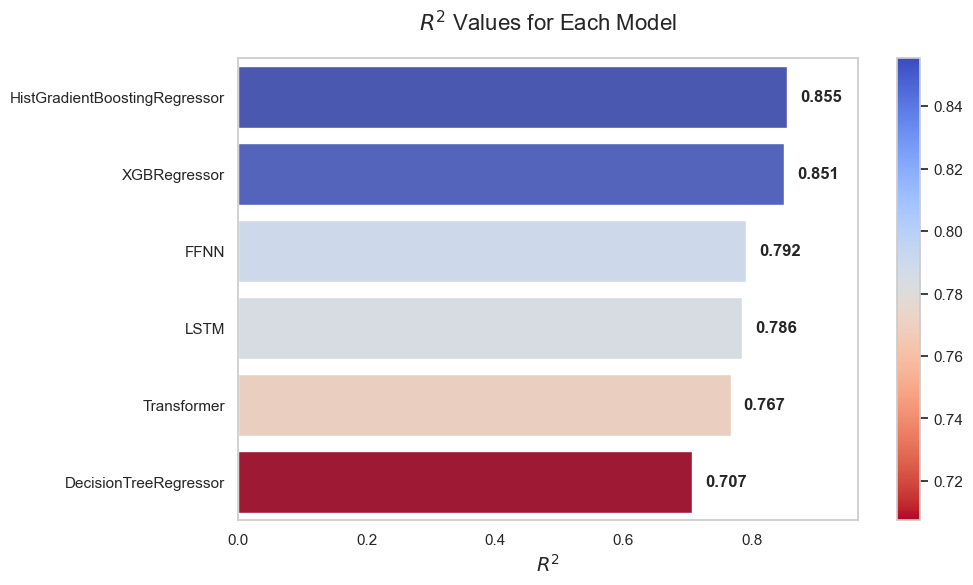

In [146]:
plt.rcdefaults()

data = pd.DataFrame({
    'Model': models,
    'R^2 Value': r2s
}).sort_values(by='R^2 Value', ascending=False)

norm = plt.Normalize(data['R^2 Value'].min(), data['R^2 Value'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm_r", norm=norm)
colors = sm.to_rgba(data['R^2 Value'])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='R^2 Value', y='Model', data=data, palette=colors)

for index, value in enumerate(data['R^2 Value']):
    ax.text(value + 0.02, index, f"{value:.3f}", va='center', fontsize=12, fontweight='bold')

plt.title(r'$R^2$ Values for Each Model', fontsize=16, pad=20)
plt.xlabel(r'$R^2$', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.xlim(0, data['R^2 Value'].max() + data['R^2 Value'].max()*0.13)

ax.grid(False) 
plt.colorbar(sm, ax=ax)  

plt.show()


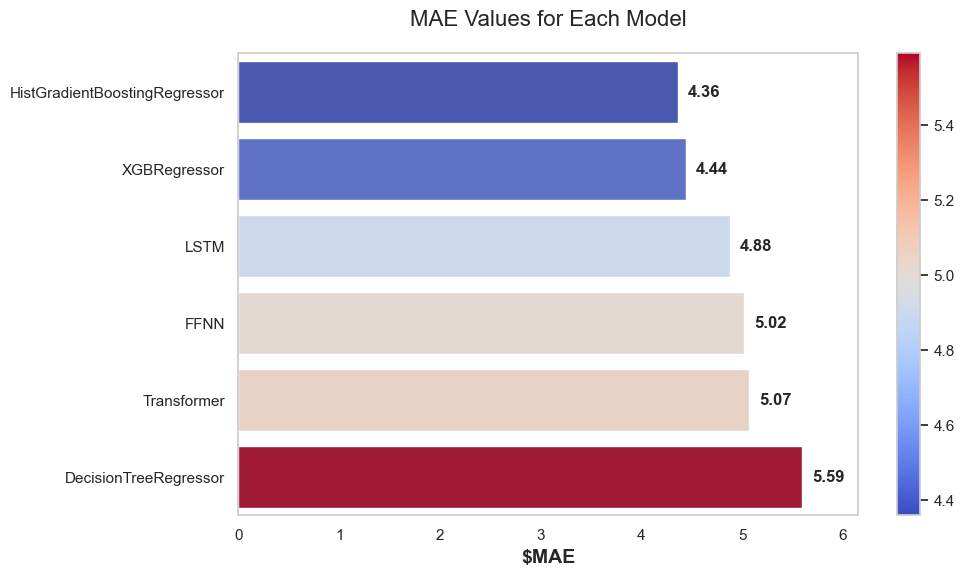

In [144]:
plt.rcdefaults()

data = pd.DataFrame({
    'Model': models,
    'MAE Value': maes
}).sort_values(by='MAE Value', ascending=True)

norm = plt.Normalize(data['MAE Value'].min(), data['MAE Value'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
colors = sm.to_rgba(data['MAE Value'])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MAE Value', y='Model', data=data, palette=colors)

for index, value in enumerate(data['MAE Value']):
    ax.text(value + 0.1, index, f"{value:.2f}", va='center', fontsize=12, fontweight='bold')

plt.title(r'MAE Values for Each Model', fontsize=16, pad=20)
plt.xlabel(r'$MAE', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.xlim(0, data['MAE Value'].max() + data['MAE Value'].max()*0.10)

ax.grid(False) 
plt.colorbar(sm, ax=ax)  

plt.show()

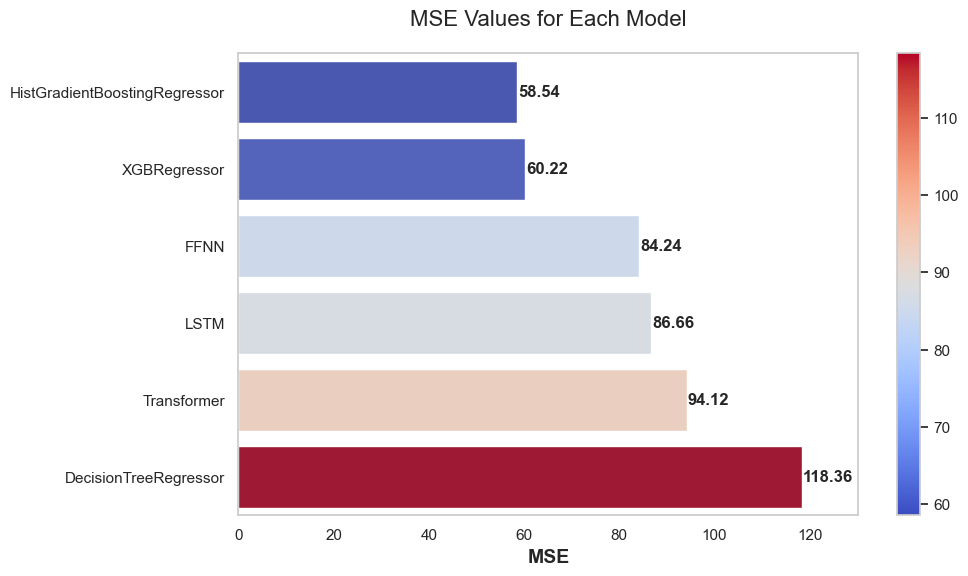

In [140]:
plt.rcdefaults()

data = pd.DataFrame({
    'Model': models,
    'MSE Value': mses
}).sort_values(by='MSE Value', ascending=True)

norm = plt.Normalize(data['MSE Value'].min(), data['MSE Value'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
colors = sm.to_rgba(data['MSE Value'])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MSE Value', y='Model', data=data, palette=colors)

for index, value in enumerate(data['MSE Value']):
    ax.text(value + 0.2, index, f"{value:.2f}", va='center', fontsize=12, fontweight='bold')

plt.title(r'MSE Values for Each Model', fontsize=16, pad=20)
plt.xlabel(r'MSE', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.xlim(0, data['MSE Value'].max() + data['MSE Value'].max()*0.10)

ax.grid(False) 
plt.colorbar(sm, ax=ax)  

plt.show()

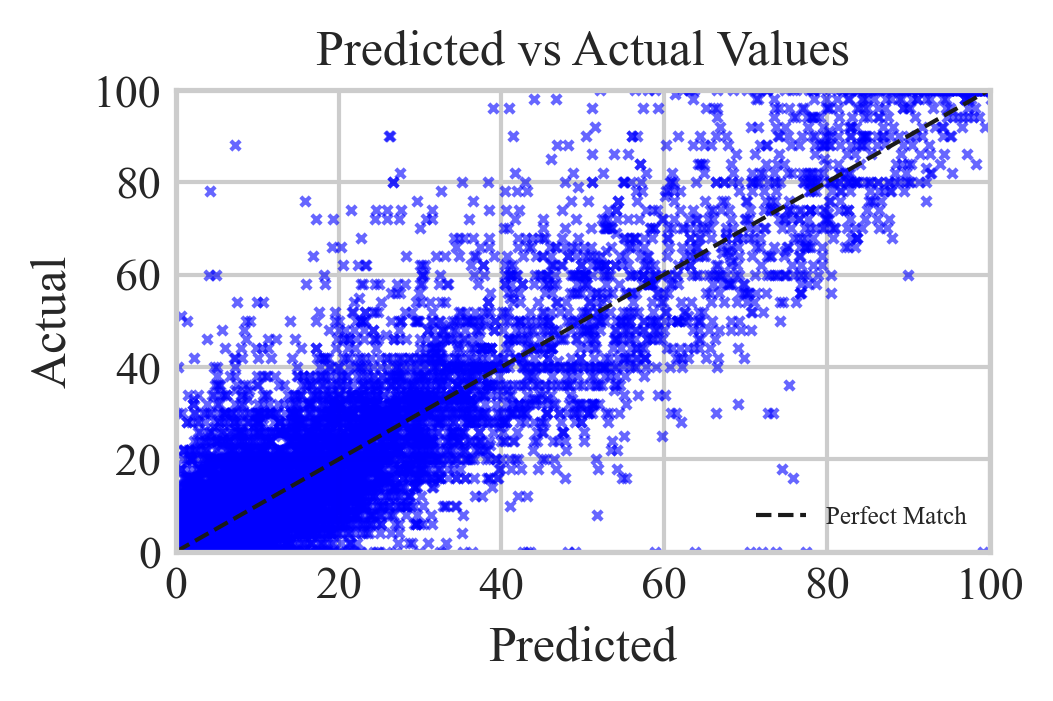

In [141]:
data = pd.DataFrame({
    'Model': models,
    'R^2 Value': r2s
}).sort_values(by='R^2 Value', ascending=False)

best_model = data.iloc[0]  
best_model_name = best_model['Model']

if best_model_name == 'DecisionTreeRegressor':
    predictions = predictions_DecisionTreeRegressor
elif best_model_name == 'XGBRegressor':
    predictions = predictions_XGBRegressor
elif best_model_name == 'FFNN':
    predictions = predictions_FFNN
elif best_model_name == 'LSTM':
    predictions = predictions_LSTM
elif best_model_name == 'HistGradientBoostingRegressor':
    predictions = predictions_HistGradientBoostingRegressor
elif best_model_name == 'Transformer':
    predictions = predictions_Transformer

plt.style.use('ieee')
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
matplotlib.rcParams.update({'figure.dpi': 300}) 
matplotlib.rcParams['font.size'] = 8  

actual_color = 'black'
pred_color = 'blue'
markersize = 5
marker_type = 'x' 

plt.figure(figsize=(3.5, 2))   
plt.title('Predicted vs Actual Values')
plt.scatter(predictions, actuals, alpha=0.6, color=pred_color, marker=marker_type, s=markersize, zorder=2, lw=1)  
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.ylim([0, 100])
plt.xlim([0, 100])
plt.plot([0, 100], [0, 100], color='k', linestyle='--', lw=1, zorder=2, label='Perfect Match')
plt.legend(frameon=False, fontsize=6, loc='lower right') 

plt.tick_params(axis='both', direction='in', length=4, width=0.8, which='major')
plt.minorticks_on()
plt.tick_params(axis='both', direction='in', length=2, width=0.5, which='minor')

plt.savefig('best_model_scatter.png')
plt.show()